EVALUACIÓN FINAL: PREDICCIÓN DE NATALIDAD SEGÚN FACTORES SOCIOECONÓMICOS

Eres parte de un equipo de investigación en demografía y te han solicitado desarrollar un modelo basado en redes neuronales para predecir la tasa de natalidad en distintos países. Para ello, contarás con un dataset que incluye información socioeconómica como el PIB per cápita, el acceso a servicios de salud, la tasa de educación y otros factores relevantes.

Tu objetivo es diseñar, entrenar y evaluar una red neuronal que permita predecir la tasa de natalidad de manera precisa, analizando el impacto de diferentes variables en la predicción.

OBJETIVOS DE LA EVALUACIÓN
1. Diseñar y entrenar una red neuronal para resolver un problema de regresión.
2. Aplicar conocimientos sobre funciones de activación, optimizadores, y estrategias para prevenir sobreajuste.
3. Evaluar y comparar los resultados obtenidos con diferentes configuraciones de la red.
4. Analizar la influencia de cada variable en la predicción y extraer conclusiones sobre patrones socioeconómicos globales.

1. Carga y exploración de datos (1 punto)

Carga el dataset proporcionado, que contiene información de distintos países sobre:
- PIB per cápita
- Acceso a servicios de salud (% de la población)
- Nivel educativo promedio
- Tasa de empleo femenino
- Edad promedio de maternidad
- Índice de urbanización
- Tasa de natalidad (variable objetivo)

Analiza las correlaciones entre variables y visualiza su distribución.

,País,PIB_per_capita,Acceso_Salud,Nivel_Educativo,Tasa_Empleo_Femenino,Edad_Maternidad,Urbanizacion,Tasa_Natalidad
0,País_1,25599.706537,51.571459,14.630475,32.584086,21.546858,71.889703,38.613409
1,País_2,57289.286853,81.820521,6.262099,56.567732,33.538294,62.165782,19.211764
2,País_3,45259.666800,65.717799,7.424431,57.031756,27.578786,48.571657,26.556891
3,País_4,37926.216631,75.428535,18.478313,61.871495,32.396862,78.827701,29.177172
4,País_5,13581.025224,95.378324,14.096436,66.304567,24.800744,71.083870,40.000000


,PIB_per_capita,Acceso_Salud,Nivel_Educativo,Tasa_Empleo_Femenino,Edad_Maternidad,Urbanizacion,Tasa_Natalidad
PIB_per_capita,1.000000,-0.034033,-0.037654,-0.211882,0.120075,0.069321,-0.866007
Acceso_Salud,-0.034033,1.000000,-0.146354,-0.011783,-0.082393,-0.228878,0.076261
Nivel_Educativo,-0.037654,-0.146354,1.000000,-0.214816,-0.034695,-0.021957,-0.124269
Tasa_Empleo_Femenino,-0.211882,-0.011783,-0.214816,1.000000,0.187530,-0.218485,0.242314
Edad_Maternidad,0.120075,-0.082393,-0.034695,0.187530,1.000000,-0.133339,-0.300375
Urbanizacion,0.069321,-0.228878,-0.021957,-0.218485,-0.133339,1.000000,0.204841
Tasa_Natalidad,-0.866007,0.076261,-0.124269,0.242314,-0.300375,0.204841,1.000000


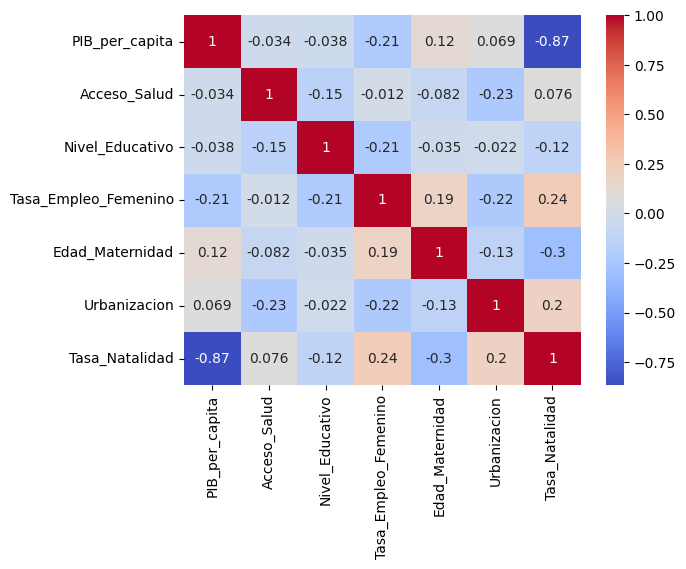

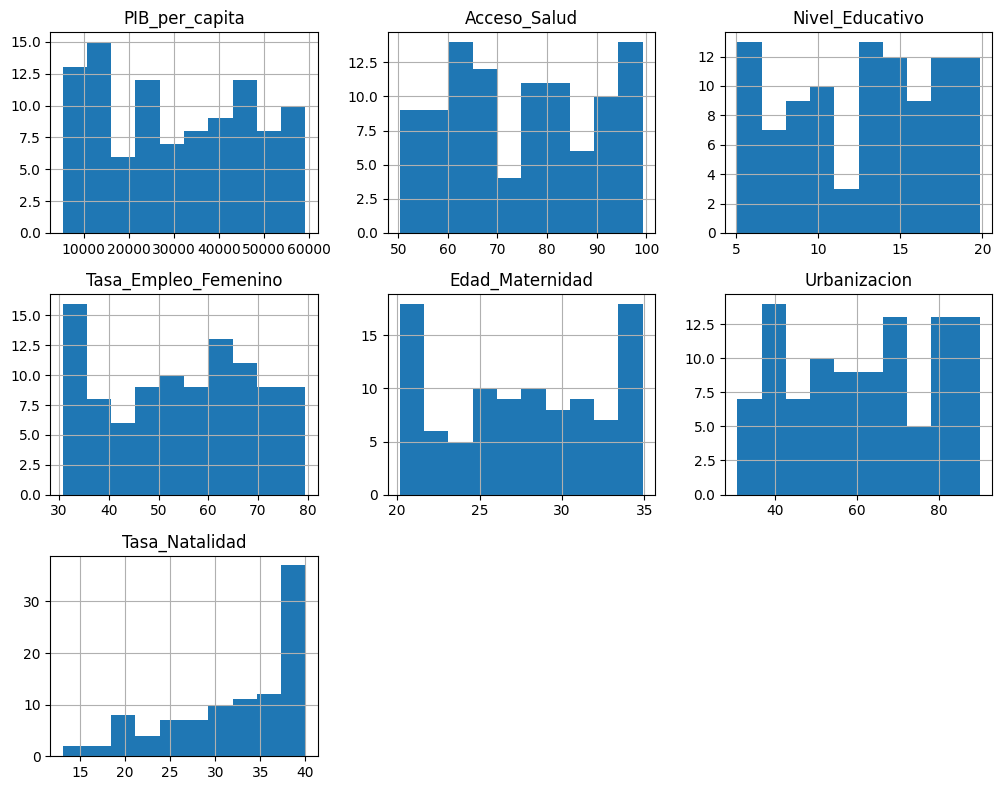

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

#Cargar dataset
df = pd.read_csv("/content/sample_data/dataset_natalidad.csv")

df_numeric = df.drop('País', axis=1)

display(df.head())

# Matriz de correlación
correlation_matrix = df_numeric.corr()
display(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Distribución de datos
df_numeric.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

2. Diseño y entrenamiento del modelo (5 puntos)

Diseña una red neuronal con la siguiente estructura:
- Capa de entrada con tantas neuronas como variables predictoras.
- Mínimo de 2 capas ocultas con activaciones adecuadas.
- Capa de salida con una neurona para predecir la tasa de natalidad.
- Aplica diferentes funciones de activación y evalúa su impacto.
- Utiliza optimizadores adecuados y experimenta con diferentes valores de learning rate.
- Aplica regularización (dropout o L2) para evitar el sobreajuste.
- Entrena el modelo utilizando una función de pérdida adecuada para problemas de regresión.

In [73]:
y = df_numeric['Tasa_Natalidad']
# Drop the 'País' column from the features as it's not numerical
x = df_numeric.drop(['Tasa_Natalidad'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

modelo = keras.Sequential([
    tf.keras.Input(shape=(x_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(1)
])


modelo.compile(optimizer=keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

modelo.summary()

history = modelo.fit(x_train_scaled, y_train, epochs=130, batch_size=32, validation_split=0.2)

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_81 (Dense)                │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,673 (18.25 KB)

 Trainable params: 4,673 (18.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/130
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step - loss: 876.3607 - val_loss: 149.9414
Epoch 2/130
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 236.2230 - val_loss: 165.5974
Epoch 3/130
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 160.2163 - val_loss: 214.2521
Epoch 4/130
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 133.1543 - val_loss: 141.0576
Epoch 5/130
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 103.5345 - val_loss: 91.3071
Epoch 6/130
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 40.5721 - val_loss: 100.6810
Epoch 7/130
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 76.7392 - val_loss: 95.5101
Epoch 8/130
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 54.2406 - val_loss: 58.3623
Epoch 9/130
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 40.7568 - val_loss: 57.0799
Epoch 10/130
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 36.5510 - val_loss: 55.7188
Epoch 11/130
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 29.4569 - val_loss: 61.4969
Epoch 12/130
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 

3. Evaluación y optimización del modelo (3 puntos)
- Evalúa el modelo con datos de prueba.
- Ajusta hiperparámetros para mejorar el rendimiento.
- Analiza el impacto de cada variable en la predicción.
- Realiza predicciones con el modelo y compáralas con datos reales.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 9.9370
Loss del modelo en datos de prueba (MSE): 9.936994552612305
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
MSE: 9.155442800259811
R^2: 0.87


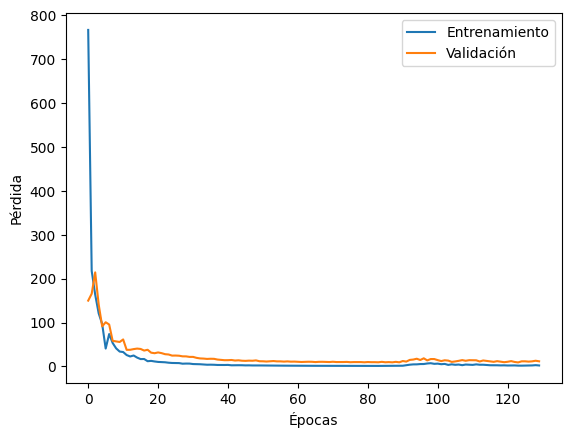

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Comparison of Actual and Predicted Birth Rates:


,Actual,Predicted
83,40.000000,40.117989
53,17.986387,17.029005
70,25.175231,27.604628
45,20.110443,23.462667
44,39.376825,35.112640
39,31.805208,35.423008
22,40.000000,39.040382
80,17.335923,20.228094
10,40.000000,36.979248
0,38.613409,31.173849


In [74]:
loss = modelo.evaluate(x_test_scaled, y_test)
print(f"Loss del modelo en datos de prueba (MSE): {loss}")

natalidad_prueba = modelo.predict(x_test_scaled)

mse = mean_squared_error(y_test, natalidad_prueba)
r2 = r2_score(y_test, natalidad_prueba)

print(f"MSE: {mse}")
print(f"R^2: {r2:.2}")

plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Predicciones versus valores reales del set de datos
y_pred = modelo.predict(x_test_scaled).flatten()

predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print("Comparison of Actual and Predicted Birth Rates:")
display(predictions_df)

4. Análisis de resultados y reflexión final (1 punto)
- Explica qué variables resultaron más influyentes en la predicción de la natalidad.
- Relaciona los resultados con tendencias demográficas globales.
- Propón mejoras o ajustes para futuras versiones del modelo.

**Respuesta**

Las variables que más ayudaron a mejorar la pérdida fueron aumentar las neuronas, se probaron primero 32, subiendo a 64, probando en distintas configuraciones (en el notebook se observa solo el resultado final usado), logrando bajar bastante el error. También se bajó el learning rate de 0.001 a 0.1, lo cual también tuvo un efecto importante. Las épocas de 100 a 200 donde ya no se observaban mayores mejoras, dejándolas finalmente en 130. Por último, se agregaron regulazadores (L2), para evitar sobreajuste, y se logró una mejora de predicciones (r-cuadrado de 0,79 a 0,87) de menor pérdida del modelo.

Es posible que una configuración distinta de las capas neuronales pueda tener mejor desempeño, aunque se probaron distintas configuraciones y tipos (relu, tanh y sigmoid).

Respecto de los datos de la tabla. Se observó la correlación (negativa) más fuerte entre la tasa de natalidad con el PIB per cápita, es decir, a mayor dinero per cápita, menor tasa de natalidad. También hubo correlación débil (positiva), con la tasa de empleo femenino. Es necesario recordar que el modelo puede encontrar patrones que no necesariamente sean evidentes en la correlación. Sin embargo, esta correlación negativa no aplica necesariamente con la realidad, donde los "países pobres", refiriéndome a lugares dónde además de pocos ingresos, haya acceso precario a la educación o a la salud, muestran mayores índices de natalidad.

Los resultados del MSE fueron 9.9370, donde en algunas épocas se logra un valor menor, refleja un R-cuadrado de 0,87. logrando que el modelo explique un 87% de la variación en la tasa de natalidad.
